# <span style="color:red"> Laboratorio di Simulazione Numerica (NSL) </span>
## <span style="color:blue">  Esercitazione  5</span>

In questa esercitazione andremo a sfruttare l'algoritmo di Metropolis per campionare la distribuzione di probabilità associata agli orbitali $1s$ e $2p$ dell'atomo di idrogeno.

### Esercizio 05.1
Consideriamo lo stato fondamentale $1s$ e lo stato eccitato $2p$ con momento angolare $l=1\,$ dell'atomo di idrogeno $H$. Le rispettive funzioni d'onda normalizzate sono:

$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0}
\qquad
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$

dove $a_0=0.0529\,nm$ è il raggio di Bohr. 

Il modulo quadro $|\Psi(\vec{r},t)|^2$ rappresenta la densità di probabilità che l'elettrone si trovi nella posizione $\vec{r}$ al tempo $t$. Vogliamo andare a campionare queste densità di probabilità nei due casi, per andare a calcolare il valore medio della posizione $\left<\vec{r}\right> $; per fare questo, adoperiamo l'algoritmo di Metropolis.

Consideriamo le funzioni d'onda espresse in coordinate cartesiane $\vec x = (x,y,z)$, e chiamiamo $T(\vec x, | \vec y)$ la probabilità di transizione di Metropolis. Utilizzeremo due diverse $T$:

 - ***Probabilità uniforme***: un punto dello spazio campionato uniformemente.
 - ***Probabilità normale multivariata***: un campionamento gaussiano per ogni componente di $\vec r\,$.
 
 Nell'adoperare l'algoritmo di Metropolis, bisogna tenere conto di alcuni aspetti:
 
 
 - Scegliamo un punto di partenza ragionevole per le densità di probabilità che vogliamo campionare; in questo caso scegliamo l'origine, che è il centro di simmetria per lo stato $1s$, mentre per lo stato $2p$ il centro di uno dei due lobi. Partire lontano dall'origine genera un campionamento che non rispetta la forma della densità che vogliamo campionare.
 
 - Gli step della transizione devono rispettare la regola empirica della "*accettazione al 50%*", in modo d avere una efficenza abbastanza alta e una correlazione abbastanza bassa. Nel caso della probabilità uniforme, questo controllo è fatto sul raggio $r$ del passo tra un punto ed un altro dello spazio; nel caso della probabilità multivariata, la quantità da regolare è la $\sigma$ della distribuzione gaussiana.
 
- Facciamo equilibrare il campionamento prima di misurare; in questo caso tuttavia l'equlibrazione non apporta modifiche sostanziali al risultato.

Nel calcolo, utilizziamo unità del raggio di Bohr $a_0$, e un numero $N_{step}=10^6$ di step Metropolis, divisi in $N_{block}=100$ blocchi per andare a calcolare valore medio ed errore statistico tramite il metodo a blocchi.

Possiamo confrontare il risultato trovato con il valore esatto, ricavato analiticamente:

$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\qquad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$

Di seguito riportiamo i risulati ottenuti, a cui aggiungiamo caso per caso una visualizzazione nello spazio del campionamento della densità di probabilità tramite l'algoritmo.

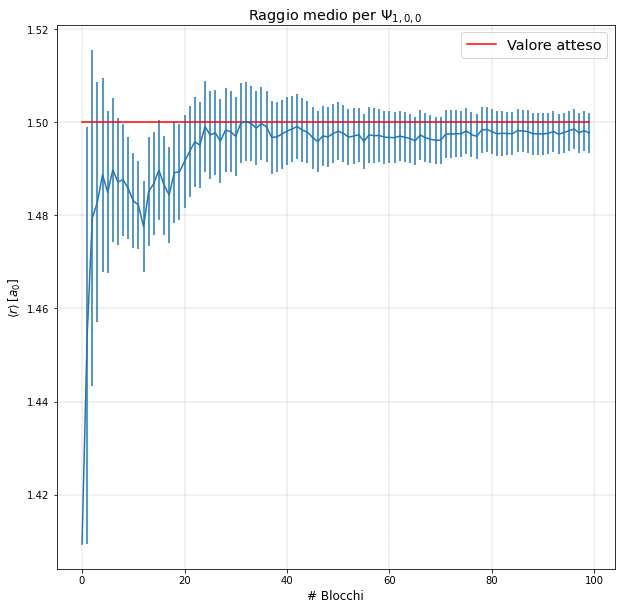

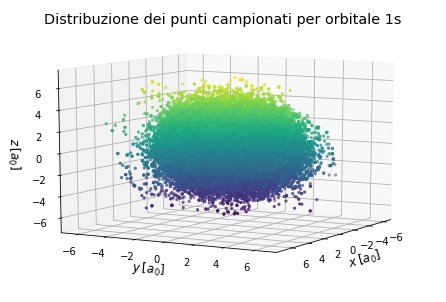

In [27]:
# 1s Uniforme

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

M=int(1e6)  #Step
N=int(100)  #Blocchi

x=np.zeros(M)
y=np.zeros(M)
z=np.zeros(M)

t=np.arange(N)
mean=np.zeros(N)
err=np.zeros(N)

expected = [1.5 for i in t]

file_pos = open("05.1/Data/1s_pos.out")
file_mean = open("05.1/Data/r_1s.out")    #Carico i file con i dati

x, y, z = np.loadtxt(file_pos, unpack=True)
mean, err = np.loadtxt(file_mean, unpack=True)
    

fig1, (ax0) = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

ax0.errorbar(t,mean,yerr=err)
ax0.plot(t,expected, 'r', label="Valore atteso")
ax0.set_xlabel('# Blocchi', fontsize='large')
ax0.set_ylabel(r"$\left\langle r \right\rangle \: [a_0]$", fontsize='large')
ax0.set_title('Raggio medio per $\Psi_{1,0,0}$', fontsize='x-large')
ax0.grid(True, linestyle="--", linewidth=0.2, color='.25', zorder=-10)
ax0.legend(fontsize='x-large')


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel(r'$x \:[a_0]$', fontsize='large')
ax.set_ylabel(r'$y \:[a_0]$', fontsize='large')
ax.set_zlabel(r'$z \:[a_0]$', fontsize='large')
ax.set_title("Distribuzione dei punti campionati per orbitale 1s",fontsize='x-large')
ax.view_init(10, 30)

plt.show()

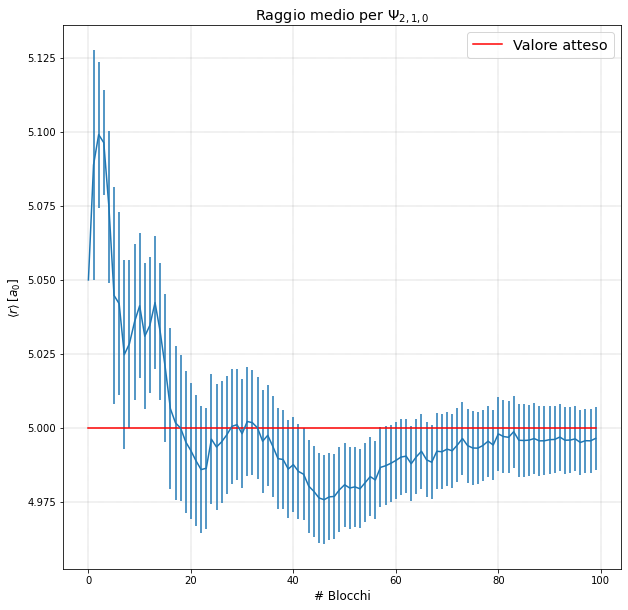

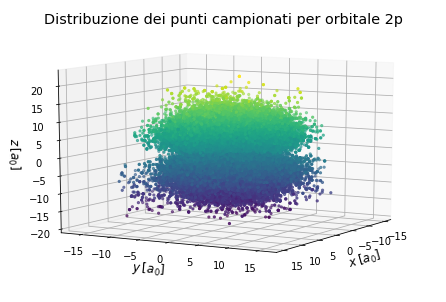

In [38]:
#2p Uniforme

M=int(1e6)
N=int(100)

x=np.zeros(M)
y=np.zeros(M)
z=np.zeros(M)

t=np.arange(N)
mean=np.zeros(N)
err=np.zeros(N)

expected = [5 for i in t]

file_pos = open("05.1/Data/2p_pos.out")
file_mean = open("05.1/Data/r_2p.out")    #Carico i file con i dati

x, y, z = np.loadtxt(file_pos, unpack=True)
mean, err = np.loadtxt(file_mean, unpack=True)

fig1, (ax0) = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

ax0.errorbar(t,mean,yerr=err)
ax0.plot(t,expected, 'r', label="Valore atteso")
ax0.set_xlabel('# Blocchi', fontsize='large')
ax0.set_ylabel(r"$\left\langle r \right\rangle \: [a_0]$", fontsize='large')
ax0.set_title('Raggio medio per $\Psi_{2,1,0}$', fontsize='x-large')
ax0.grid(True, linestyle="--", linewidth=0.2, color='.25', zorder=-10)
ax0.legend(fontsize='x-large')


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel(r'$x \:[a_0]$', fontsize='large')
ax.set_ylabel(r'$y \:[a_0]$', fontsize='large')
ax.set_zlabel(r'$z \:[a_0]$', fontsize='large')
ax.set_title("Distribuzione dei punti campionati per orbitale 2p",fontsize='x-large')
ax.view_init(10, 30)

plt.show()

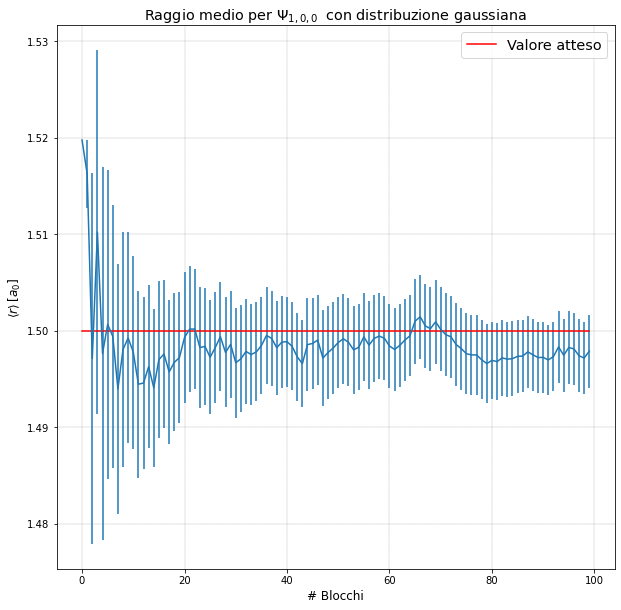

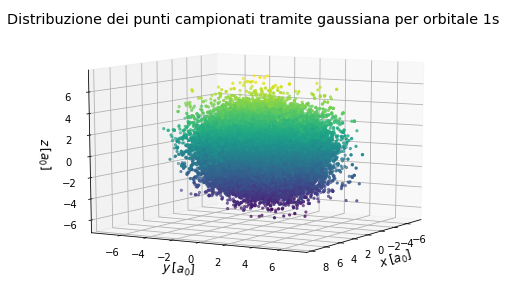

In [34]:
#1s Gauss

M=int(1e6)
N=int(100)

x=np.zeros(M)
y=np.zeros(M)
z=np.zeros(M)

t=np.arange(N)
mean=np.zeros(N)
err=np.zeros(N)

expected = [1.5 for i in t]

file_pos = open("05.1/Data/1s_pos_gauss.out")
file_mean = open("05.1/Data/r_1s_gauss.out")    #Carico i file con i dati

x, y, z = np.loadtxt(file_pos, unpack=True)
mean, err = np.loadtxt(file_mean, unpack=True)
    

fig1, (ax0) = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

ax0.errorbar(t,mean,yerr=err)
ax0.plot(t,expected, 'r', label="Valore atteso")
ax0.set_xlabel('# Blocchi', fontsize='large')
ax0.set_ylabel(r"$\left\langle r \right\rangle \: [a_0]$", fontsize='large')
ax0.set_title('Raggio medio per $\Psi_{1,0,0}\:$ con distribuzione gaussiana', fontsize='x-large')
ax0.grid(True, linestyle="--", linewidth=0.2, color='.25', zorder=-10)
ax0.legend(fontsize='x-large')


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel(r'$x \:[a_0]$', fontsize='large')
ax.set_ylabel(r'$y \:[a_0]$', fontsize='large')
ax.set_zlabel(r'$z \:[a_0]$', fontsize='large')
ax.set_title("Distribuzione dei punti campionati tramite gaussiana per orbitale 1s",fontsize='x-large')
ax.view_init(10, 30)

plt.show()

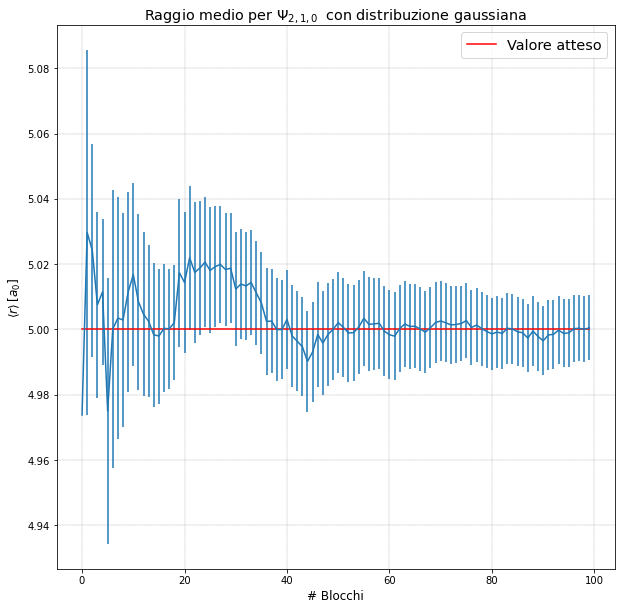

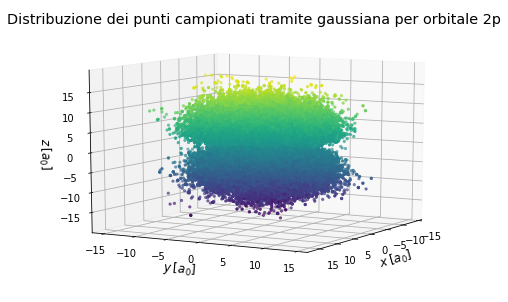

In [37]:
#2p Gauss

M=int(1e6)
N=int(100)

x=np.zeros(M)
y=np.zeros(M)
z=np.zeros(M)

t=np.arange(N)
mean=np.zeros(N)
err=np.zeros(N)

expected = [5 for i in t]

file_pos = open("05.1/Data/2p_pos_gauss.out")
file_mean = open("05.1/Data/r_2p_gauss.out")    #Carico i file con i dati

x, y, z = np.loadtxt(file_pos, unpack=True)
mean, err = np.loadtxt(file_mean, unpack=True)

fig1, (ax0) = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

ax0.errorbar(t,mean,yerr=err)
ax0.plot(t,expected, 'r', label="Valore atteso")
ax0.set_xlabel('# Blocchi', fontsize='large')
ax0.set_ylabel(r"$\left\langle r \right\rangle \: [a_0]$", fontsize='large')
ax0.set_title('Raggio medio per $\Psi_{2,1,0}\:$ con distribuzione gaussiana', fontsize='x-large')
ax0.grid(True, linestyle="--", linewidth=0.2, color='.25', zorder=-10)
ax0.legend(fontsize='x-large')


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel(r'$x \:[a_0]$', fontsize='large')
ax.set_ylabel(r'$y \:[a_0]$', fontsize='large')
ax.set_zlabel(r'$z \:[a_0]$', fontsize='large')
ax.set_title("Distribuzione dei punti campionati tramite gaussiana per orbitale 2p",fontsize='x-large')
ax.view_init(10, 30)

plt.show()

Vediamo come in tutti i casi la convergenza al valore esatto è molto buona, entro una deviazione standard; riportiamo anche i valori dei parametri scelti per avere un tasso di accettazione del 50% (espressi in unita di $a_0$):

$$ r_{1s} = 1.13  \quad  r_{2p} = 2.75  \quad  \sigma_{1s} = 0.78  \quad \sigma_{2p} = 1.85 $$